In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np

### Train

In [105]:
df = pd.read_csv('preprocessed_tweets.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

Number of subevents (0 -> 1 transitions): 23


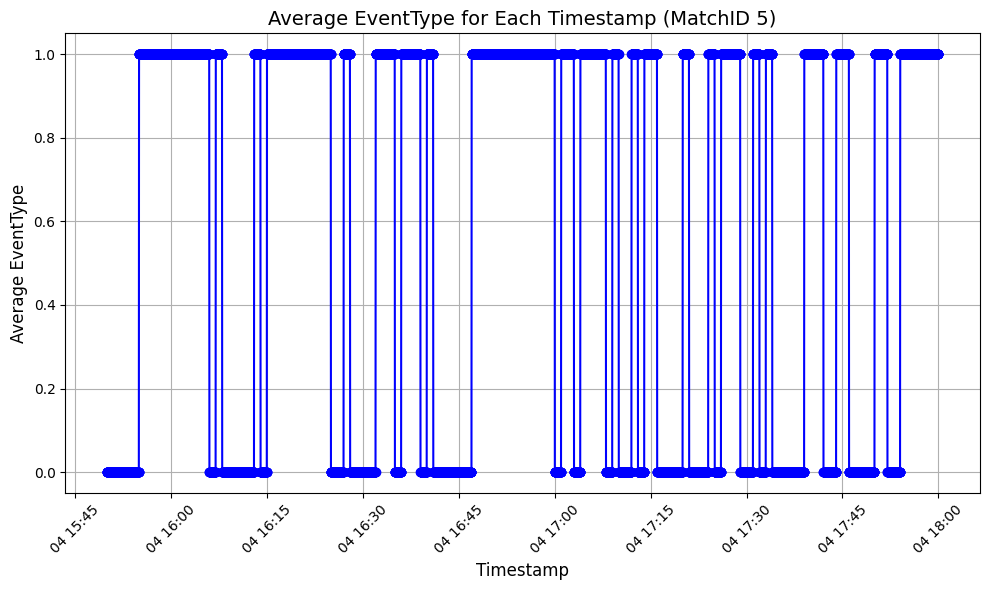

In [106]:
grouped = df.groupby('MatchID')

# For a specific match ID (e.g., MatchID 0)
match_data_0 = grouped.get_group(5)

# Now group 'match_data_0' by 'Timestamp'
timestamp_group = match_data_0.groupby('Timestamp')

avg_event_per_timestamp = match_data_0.groupby('Timestamp')['EventType'].mean()

subevent_count = 0

# Iterate through avg_event_per_timestamp to count transitions from 0 to 1
for i in range(1, len(avg_event_per_timestamp)):
    # Check for a transition from 0 (or below a small threshold) to 1
    if avg_event_per_timestamp.iloc[i - 1] == 0 and avg_event_per_timestamp.iloc[i] > 0:
        subevent_count += 1

print(f"Number of subevents (0 -> 1 transitions): {subevent_count}")

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(avg_event_per_timestamp.index, avg_event_per_timestamp.values, marker='o', linestyle='-', color='b')
plt.title('Average EventType for Each Timestamp (MatchID 5)', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Average EventType', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

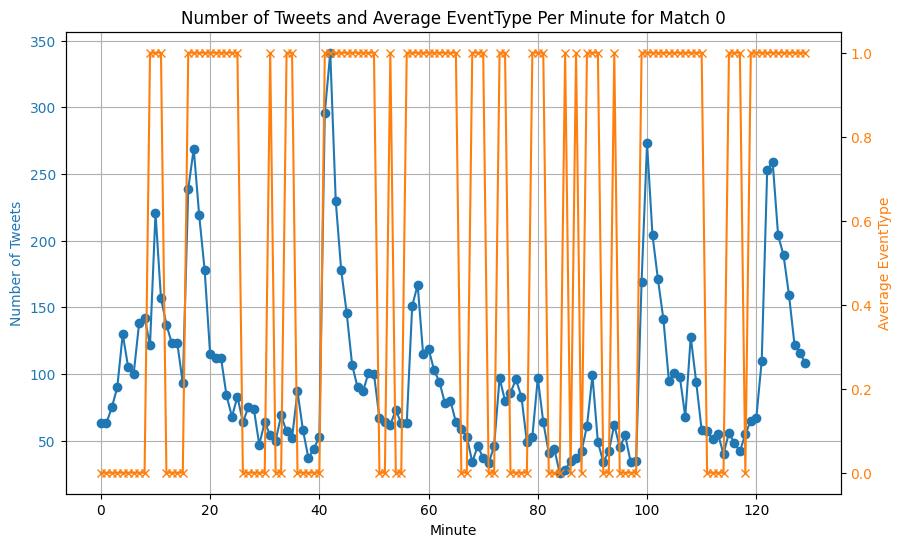

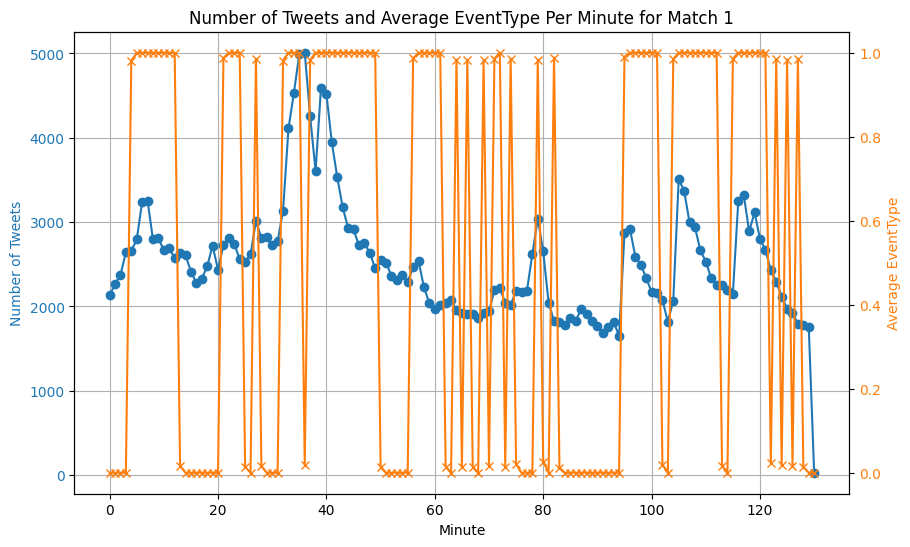

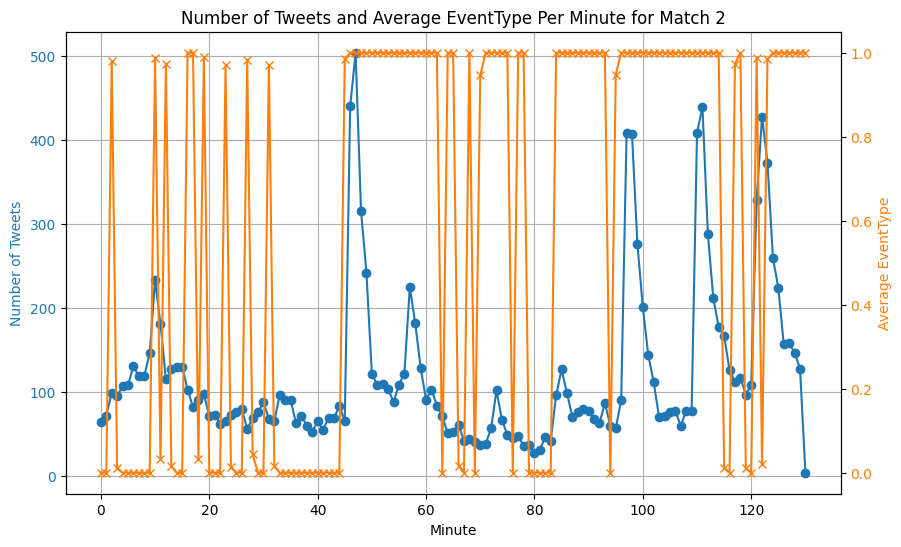

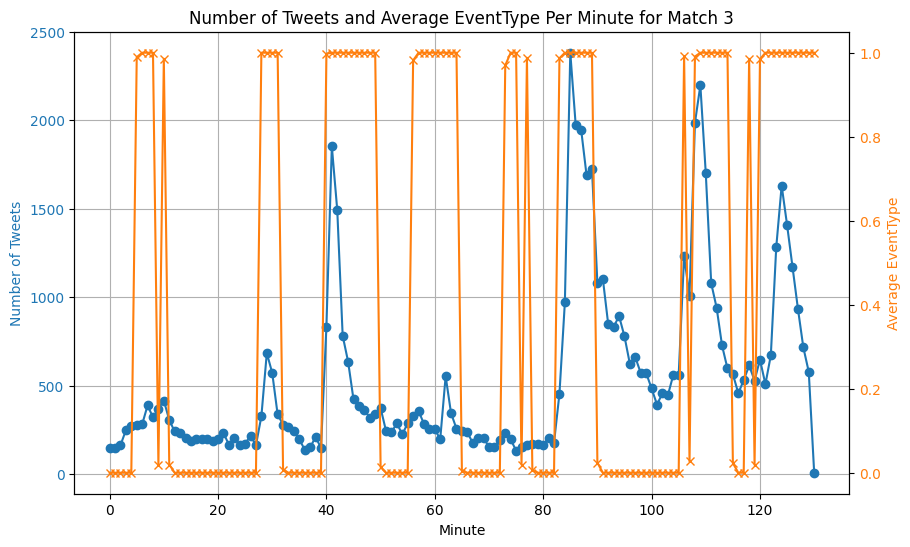

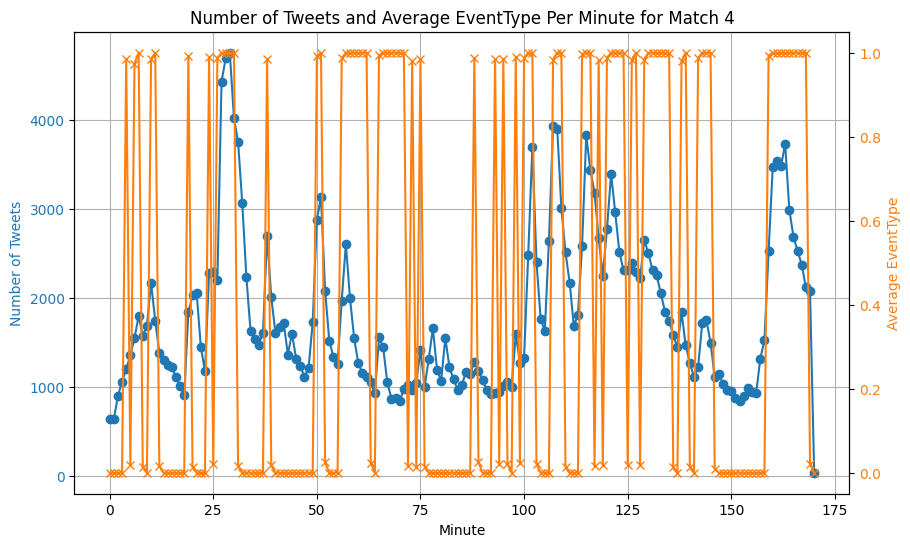

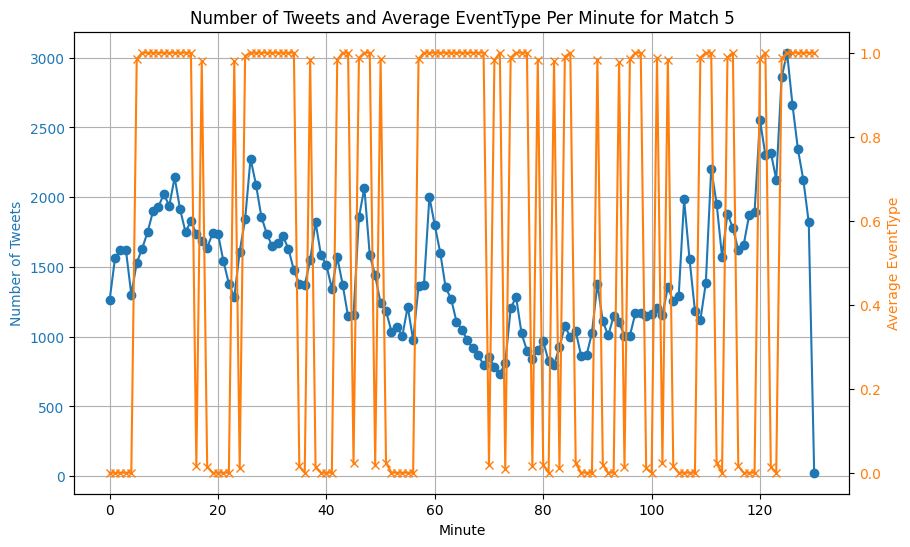

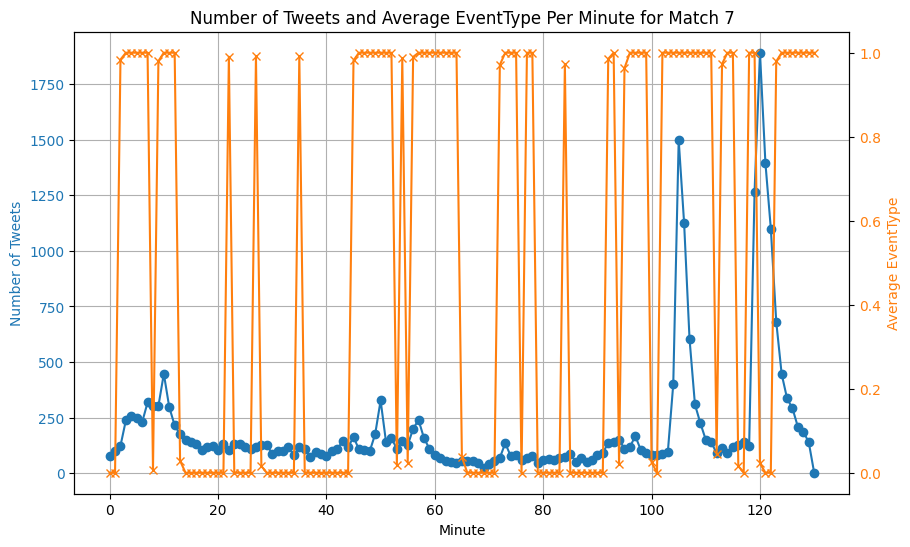

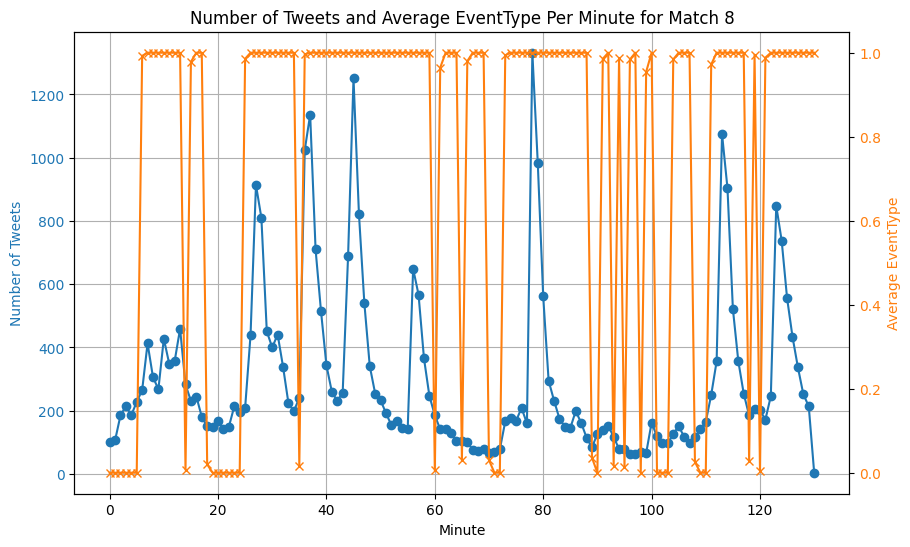

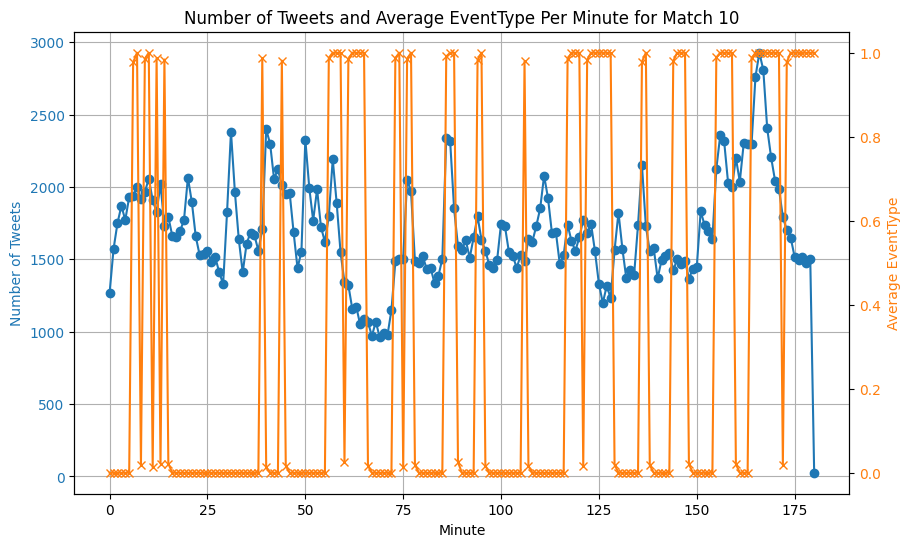

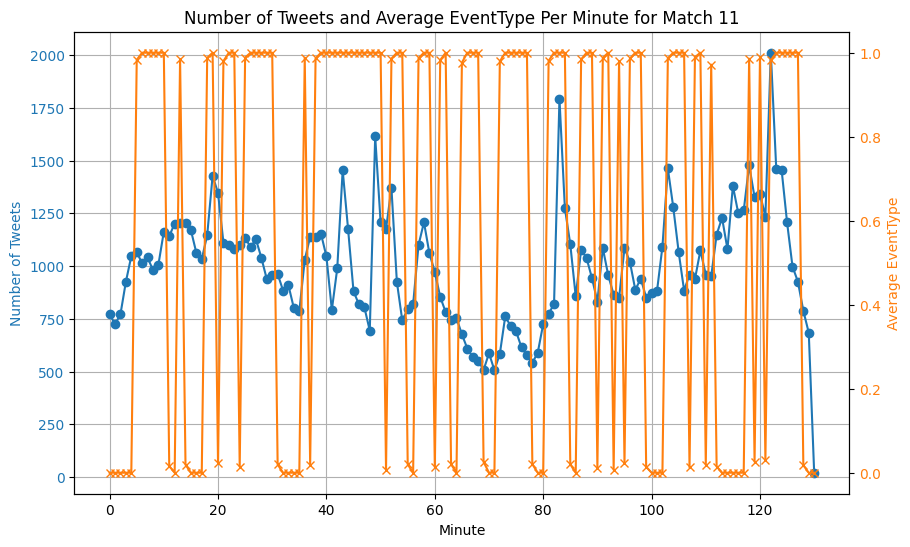

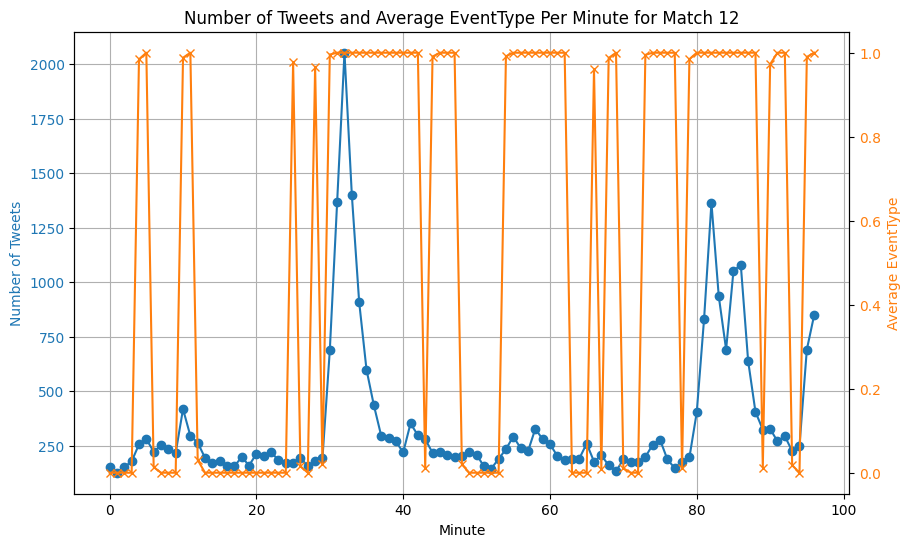

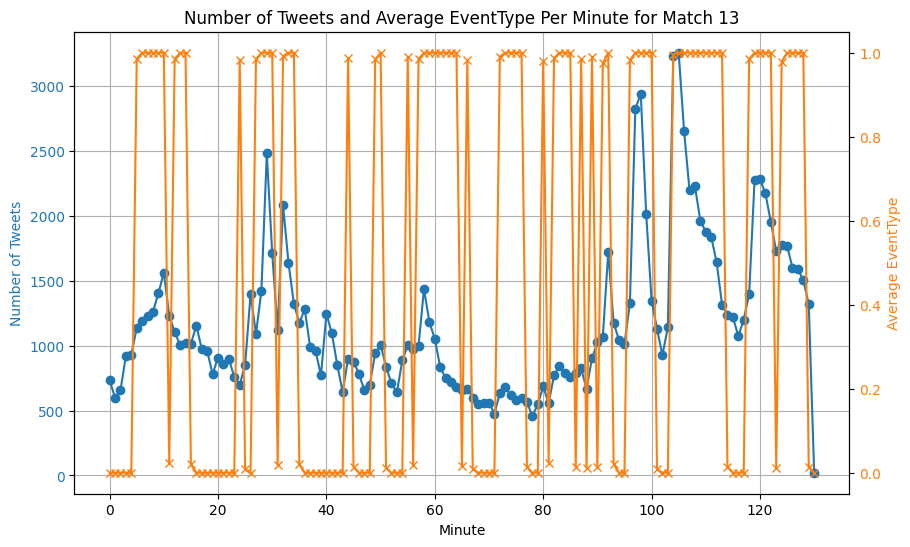

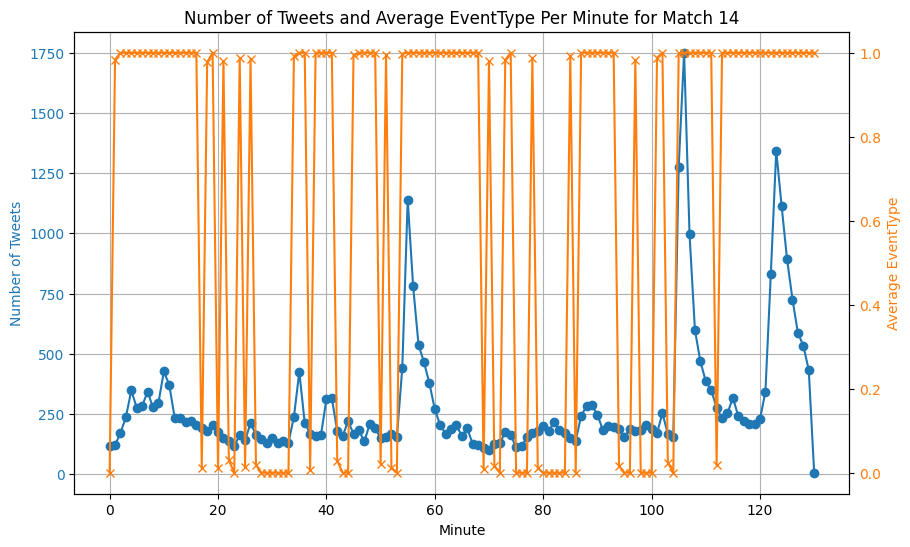

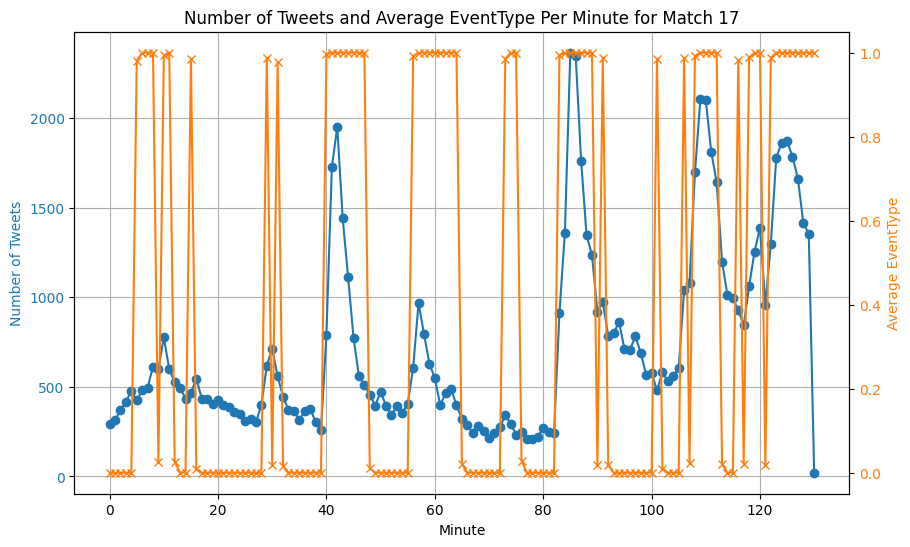

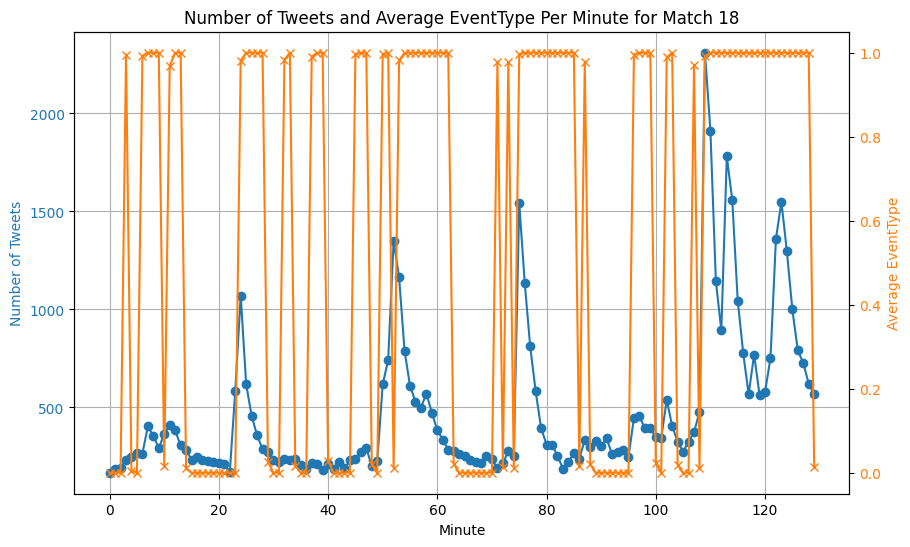

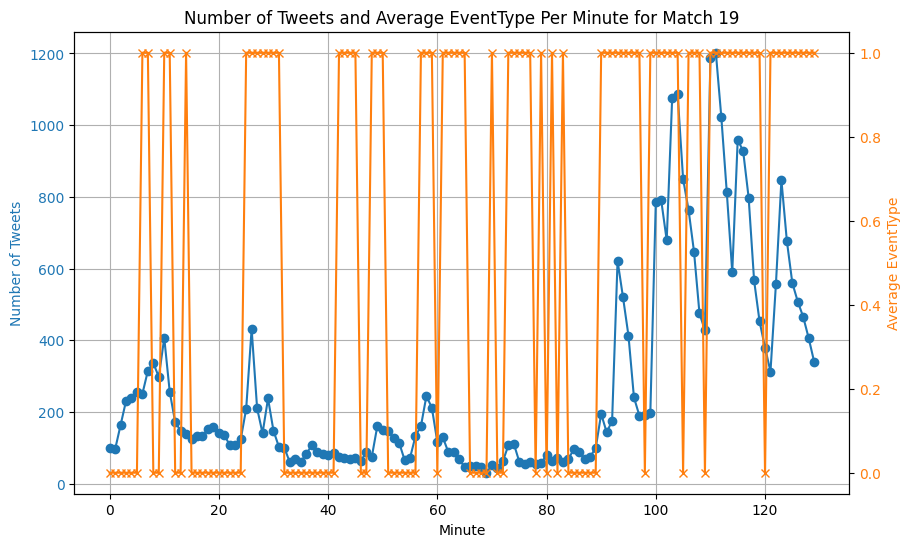

In [107]:
for match_id, match_data in df.groupby('MatchID'):
    # Calculate minute-wise tweet counts for each match
    start_time = match_data['Timestamp'].min()  # Match start time (first tweet)
    match_data['Minute'] = (match_data['Timestamp'] - start_time).dt.total_seconds() // 60  # Group by minute
    
    data_per_minute = match_data.groupby('Minute')
    avg_event_type_per_minute = data_per_minute['EventType'].mean()
    
    
    # Count the number of tweets per minute for this match
    tweet_count_per_minute = data_per_minute.size()

    # Plot the tweet counts and the average EventType for this match
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the tweet count on the primary y-axis
    ax1.set_xlabel('Minute')
    ax1.set_ylabel('Number of Tweets', color='tab:blue')
    ax1.plot(tweet_count_per_minute.index, tweet_count_per_minute.values, marker='o', color='tab:blue', label='Tweet Count')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis to plot the average EventType
    ax2 = ax1.twinx()
    ax2.set_ylabel('Average EventType', color='tab:orange')
    ax2.plot(avg_event_type_per_minute.index, avg_event_type_per_minute.values, marker='x', color='tab:orange', label='Avg EventType')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Add a title and grid
    plt.title(f'Number of Tweets and Average EventType Per Minute for Match {match_id}')
    ax1.grid(True)
    
    # Show the plot
    plt.show()

### Test / Eval

In [108]:
import os
eval_dfs = []
for fname in os.listdir("challenge_data/eval_tweets"):
    val_df = pd.read_csv("challenge_data/eval_tweets/" + fname)
    eval_dfs.append(val_df)

eval_df = pd.concat(eval_dfs, ignore_index=True)

In [109]:
eval_df.to_csv("eval_tweets.csv", index=False)

In [ ]:
# Load subevent data from CSV
subevent_df = pd.read_csv("svm_better_preprocessing_predictions_glove.csv")

# Parse MatchID and Minute from the ID column
subevent_df[['MatchID', 'Minute']] = subevent_df['ID'].str.split('_', expand=True)
subevent_df['MatchID'] = subevent_df['MatchID'].astype(int)
subevent_df['Minute'] = subevent_df['Minute'].astype(int)

# Load subevent data from CSV
subevent_df2 = pd.read_csv("svm_predictions_glove_50.csv")

# Parse MatchID and Minute from the ID column
subevent_df2[['MatchID', 'Minute']] = subevent_df2['ID'].str.split('_', expand=True)
subevent_df2['MatchID'] = subevent_df2['MatchID'].astype(int)
subevent_df2['Minute'] = subevent_df2['Minute'].astype(int)

# Load subevent data from CSV
subevent_df3 = pd.read_csv("svm_bert_predictions.csv")

# Parse MatchID and Minute from the ID column
subevent_df3[['MatchID', 'Minute']] = subevent_df3['ID'].str.split('_', expand=True)
subevent_df3['MatchID'] = subevent_df3['MatchID'].astype(int)
subevent_df3['Minute'] = subevent_df3['Minute'].astype(int)


FileNotFoundError: [Errno 2] No such file or directory: 'svm_predictions_glove_50.csv'

In [117]:
eval_df = pd.read_csv("eval_tweets.csv")
eval_df['Timestamp'] = pd.to_datetime(eval_df['Timestamp'], unit='ms')

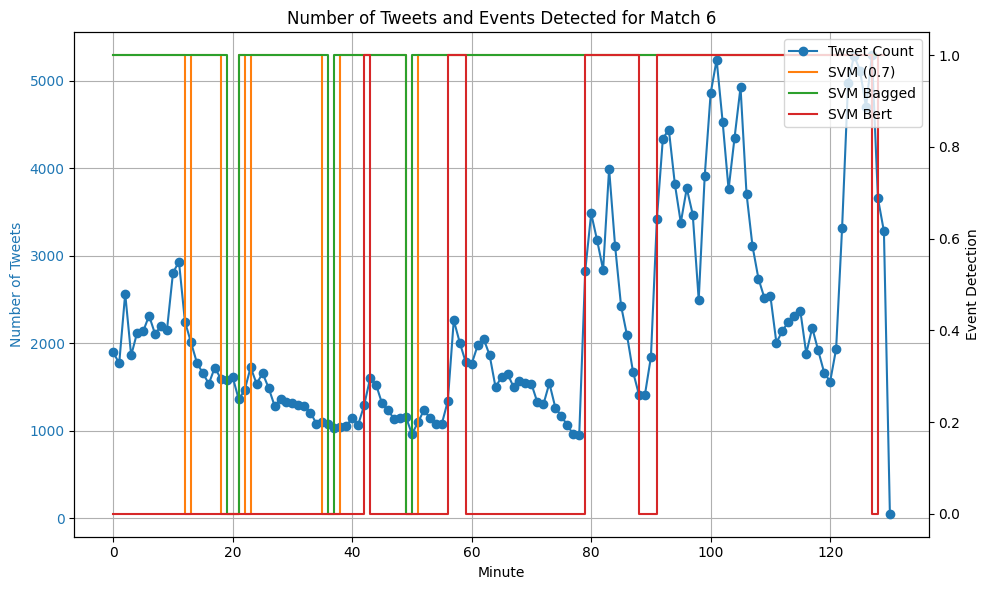

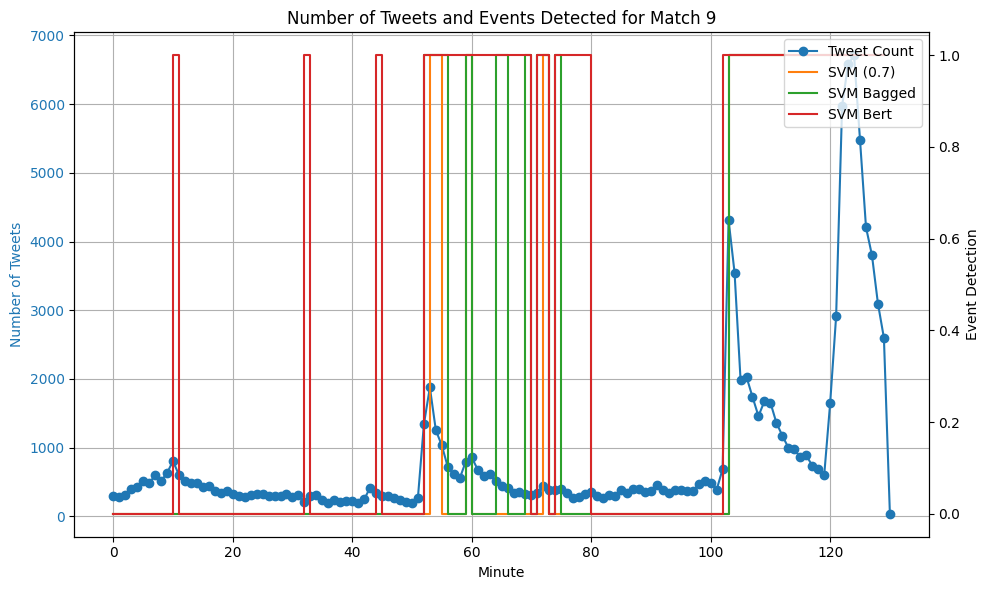

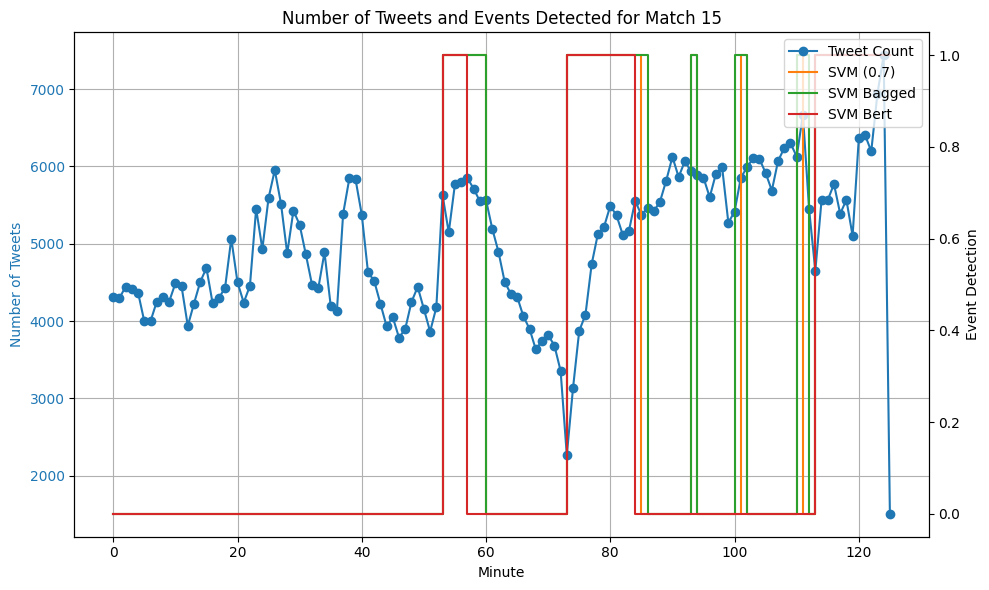

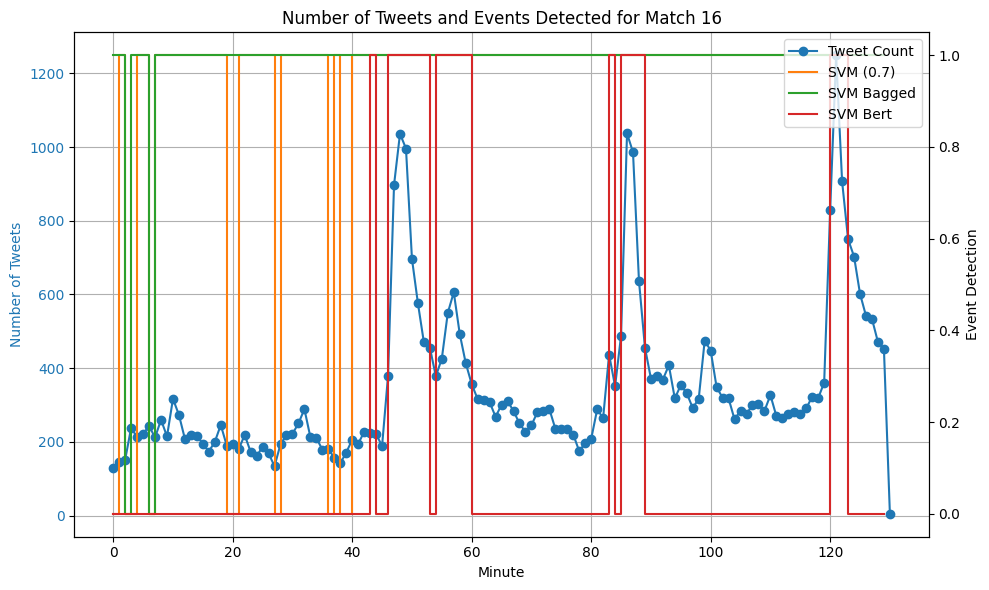

In [ ]:
for match_id, match_data in eval_df.groupby('MatchID'):
    # Calculate minute-wise tweet counts for each match
    start_time = match_data['Timestamp'].min()  # Match start time (first tweet)
    match_data['Minute'] = (match_data['Timestamp'] - start_time).dt.total_seconds() // 60  # Group by minute
    
    data_per_minute = match_data.groupby('Minute')
    
    # Count the number of tweets per minute for this match
    tweet_count_per_minute = data_per_minute.size()

    # Filter subevents for the current match
    subevents = subevent_df[subevent_df['MatchID'] == match_id]
    subevents2 = subevent_df2[subevent_df2['MatchID'] == match_id]
    subevents3 = subevent_df3[subevent_df3['MatchID'] == match_id]

    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot tweet count on primary axis (left)
    ax1.set_xlabel('Minute')
    ax1.set_ylabel('Number of Tweets', color='tab:blue')
    ax1.plot(tweet_count_per_minute.index, tweet_count_per_minute.values, 
            marker='o', color='tab:blue', label='Tweet Count')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create secondary axis (right)
    ax2 = ax1.twinx()
    
    # Plot both models on the secondary axis
    ax2.set_ylabel('Event Detection', color='black')
    ax2.step(subevents['Minute'], subevents['EventType'], 
             color='tab:orange', label='SVM (0.7)', where='post')
    ax2.step(subevents2['Minute'], subevents2['EventType'], 
             color='tab:green', label='SVM Glove 50', where='post')
    ax2.step(subevents3['Minute'], subevents3['EventType'], 
             color='tab:red', label='SVM Bert', where='post')
    ax2.tick_params(axis='y')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Add title and grid
    plt.title(f'Number of Tweets and Events Detected for Match {match_id}')
    ax1.grid(True)
    
    # Adjust layout to prevent label overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()